In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/retail_store_sales.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:
df.shape

(12575, 11)

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


<Axes: >

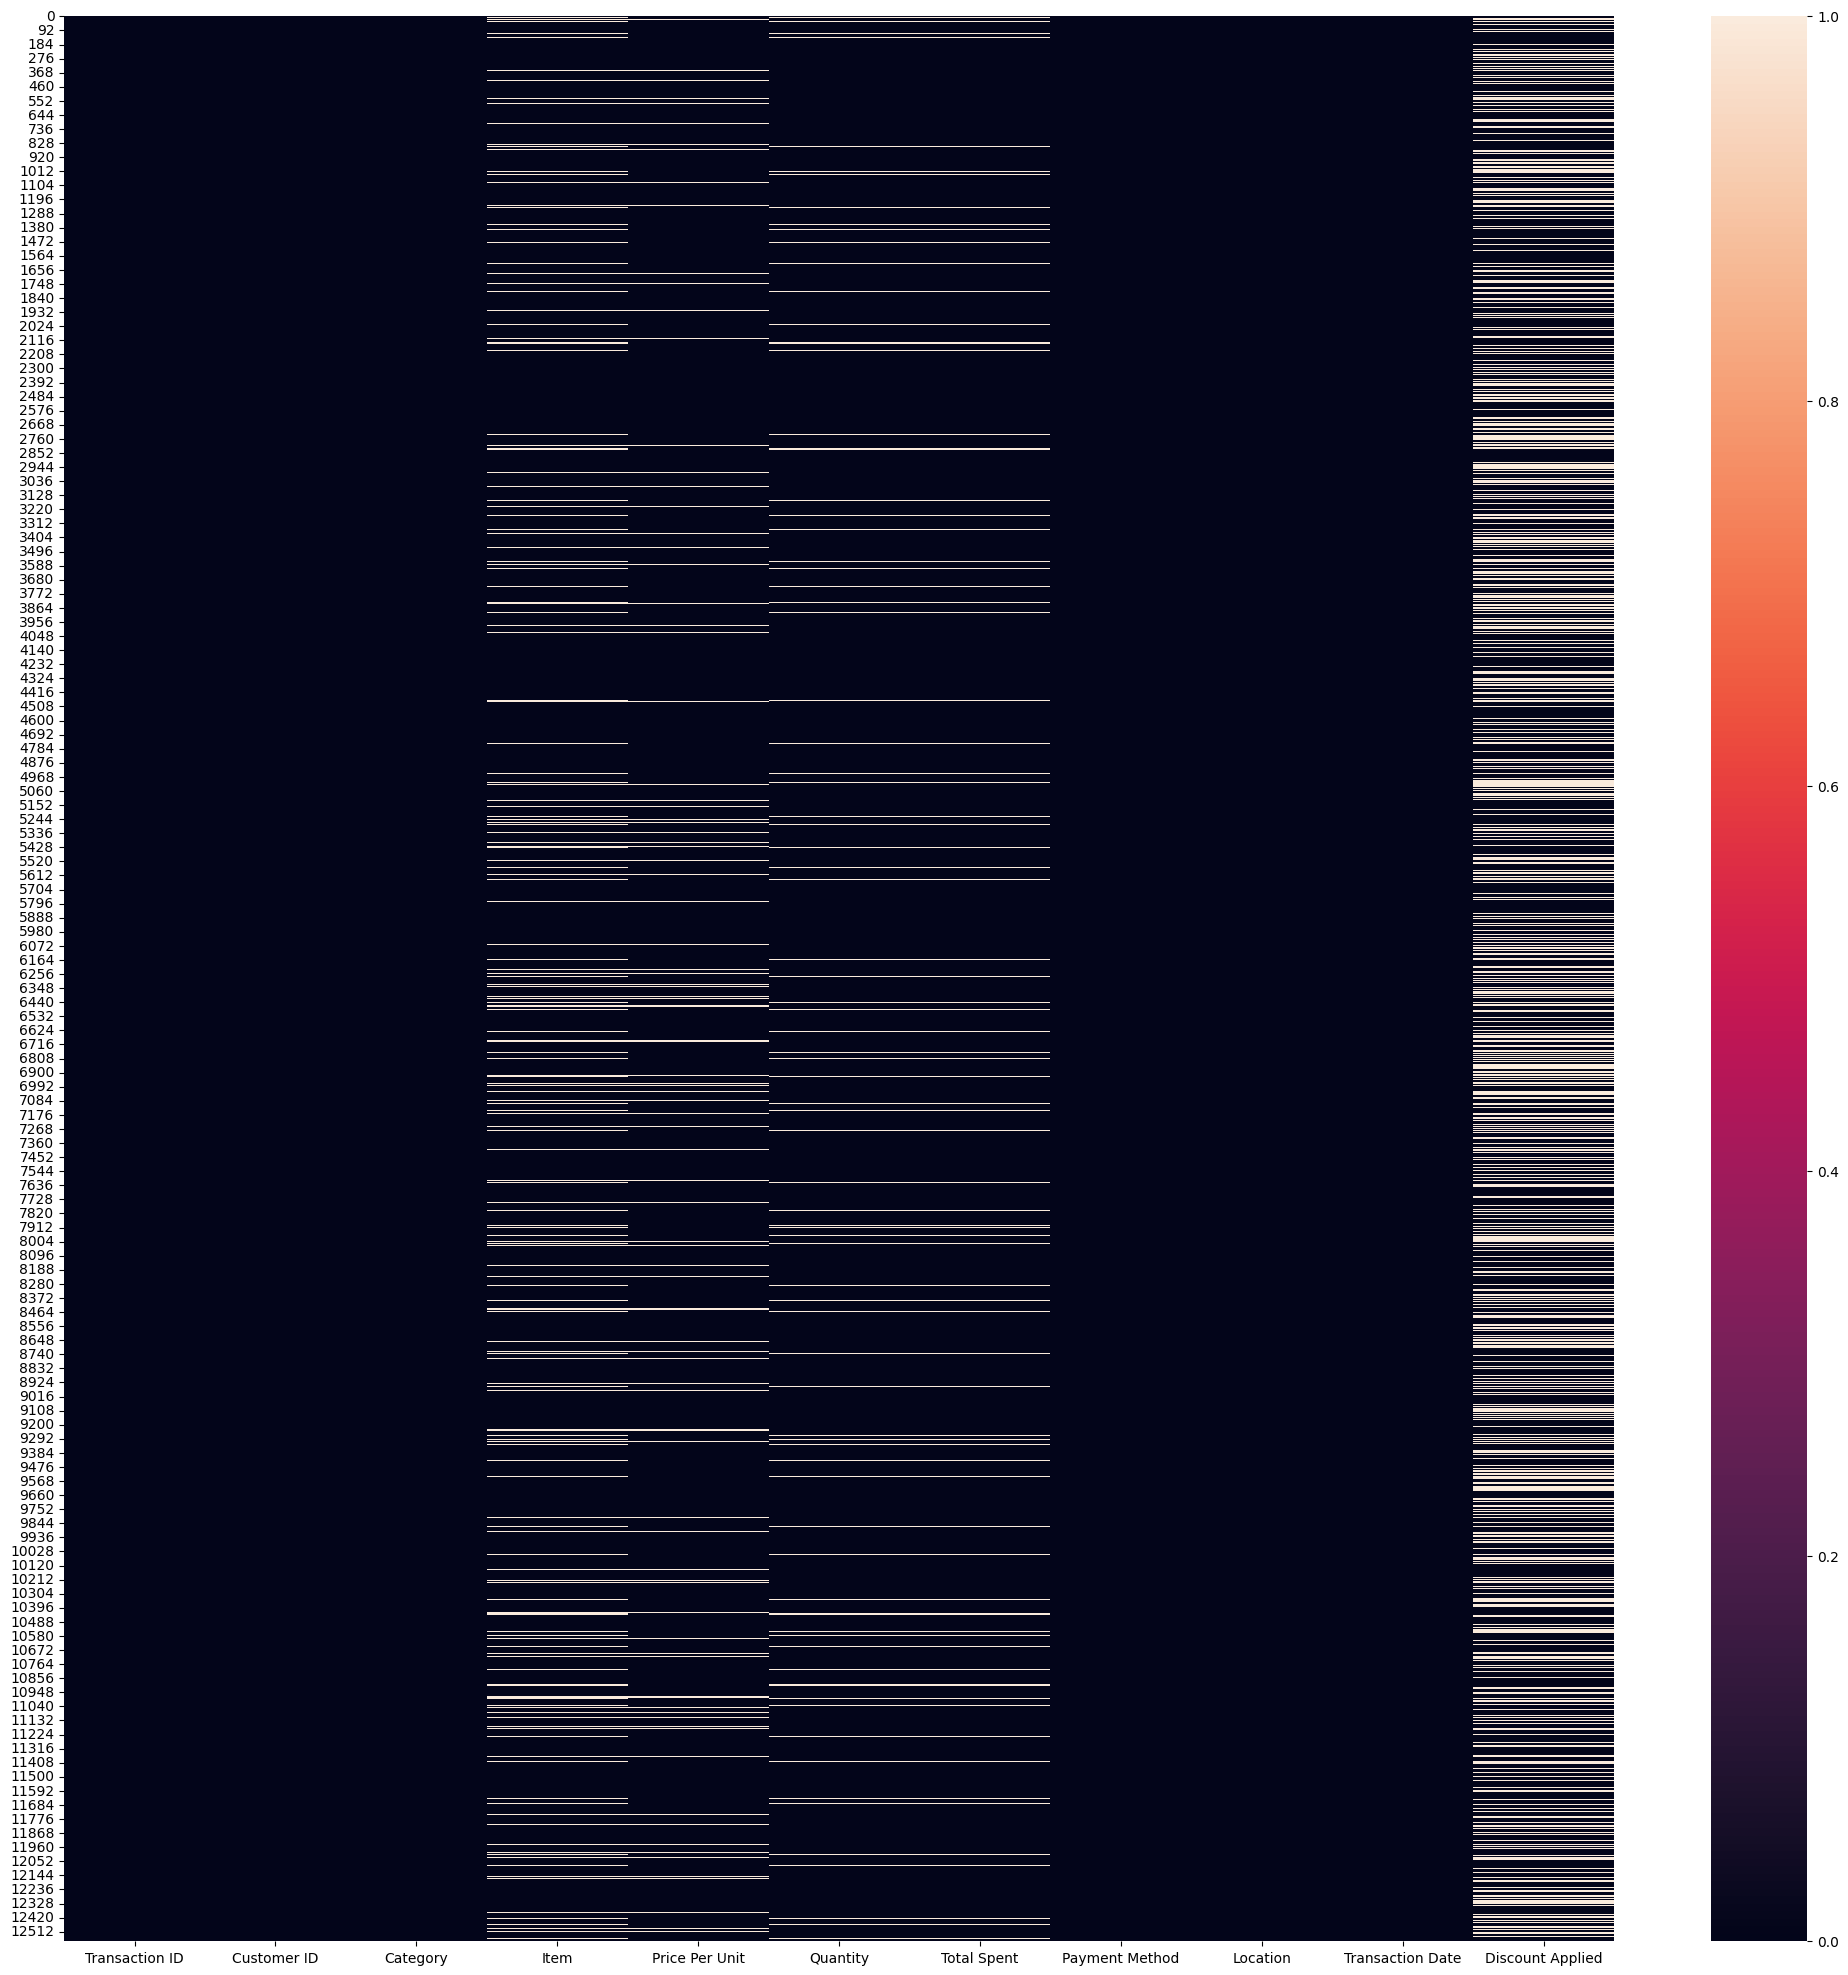

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
null_var=df.isnull().sum()/df.shape[0]*100

In [ ]:
drop_clms=null_var[null_var>30].keys()

In [ ]:
df2_drop_clms=df.drop(columns=drop_clms)


In [ ]:
df2_drop_clms.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


<Axes: >

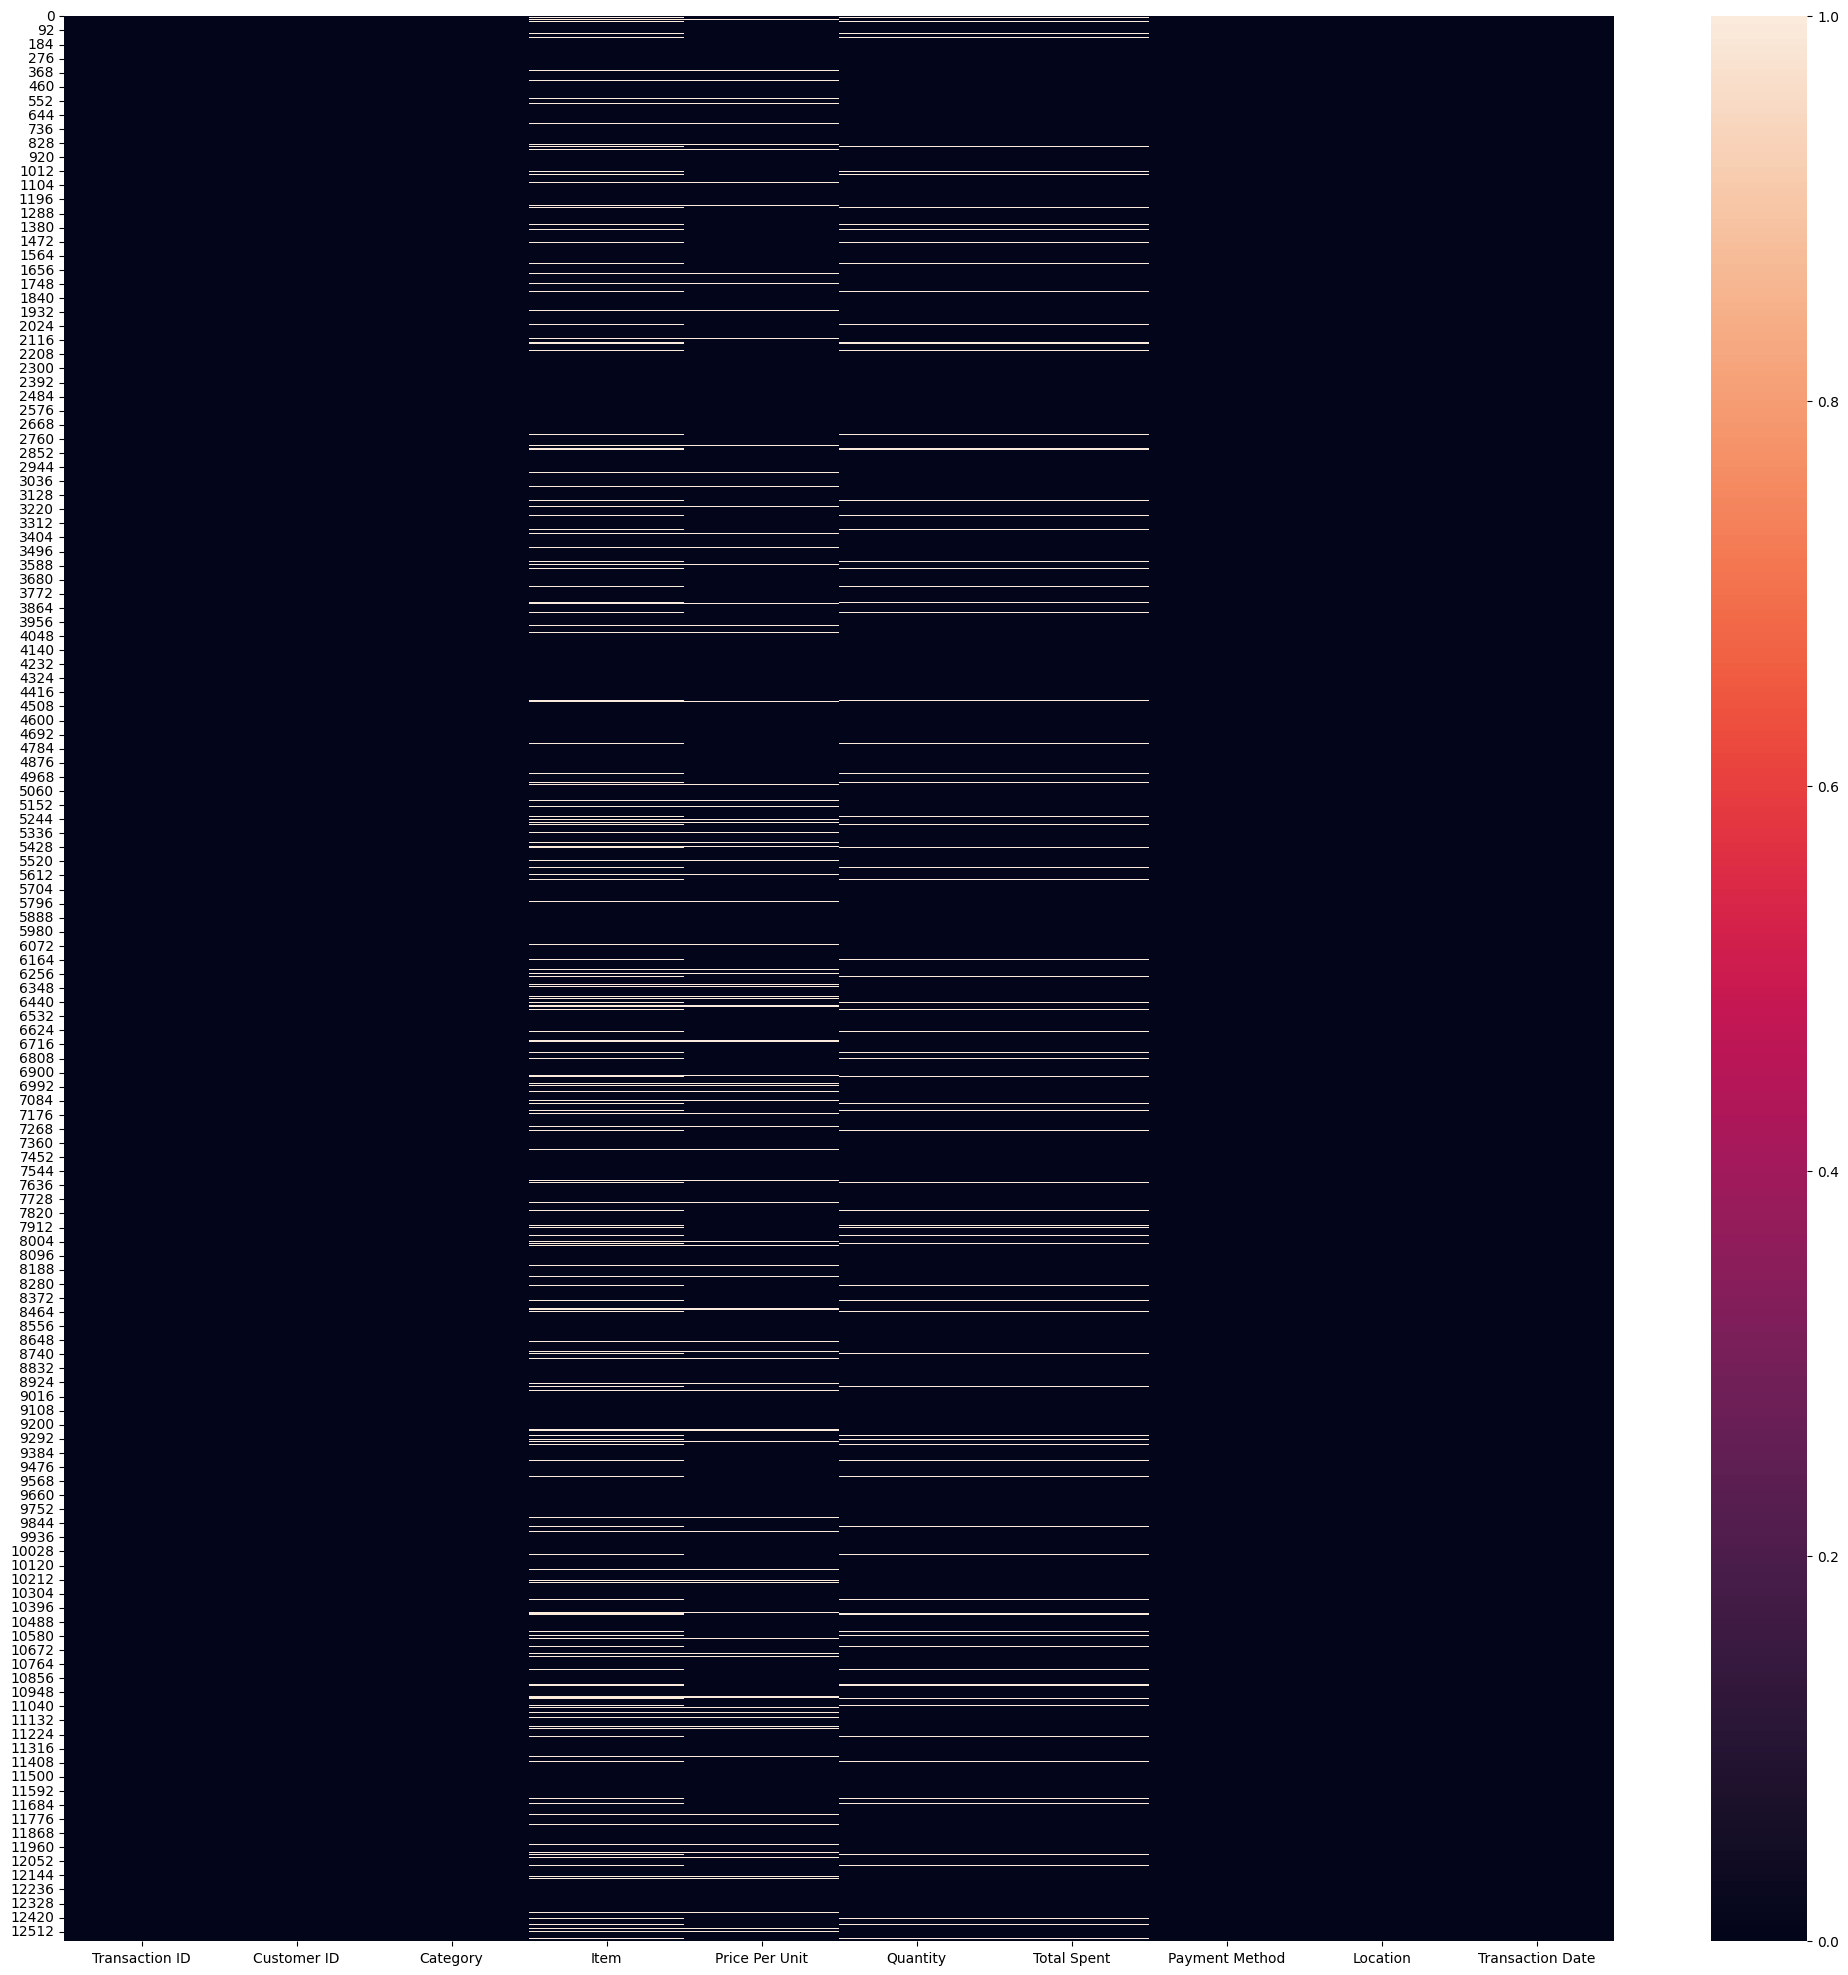

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df2_drop_clms.isnull())

In [ ]:
df3_drop_rows=df2_drop_clms.dropna()

In [ ]:
df3_drop_rows.isnull().sum().sum()

np.int64(0)

<Axes: >

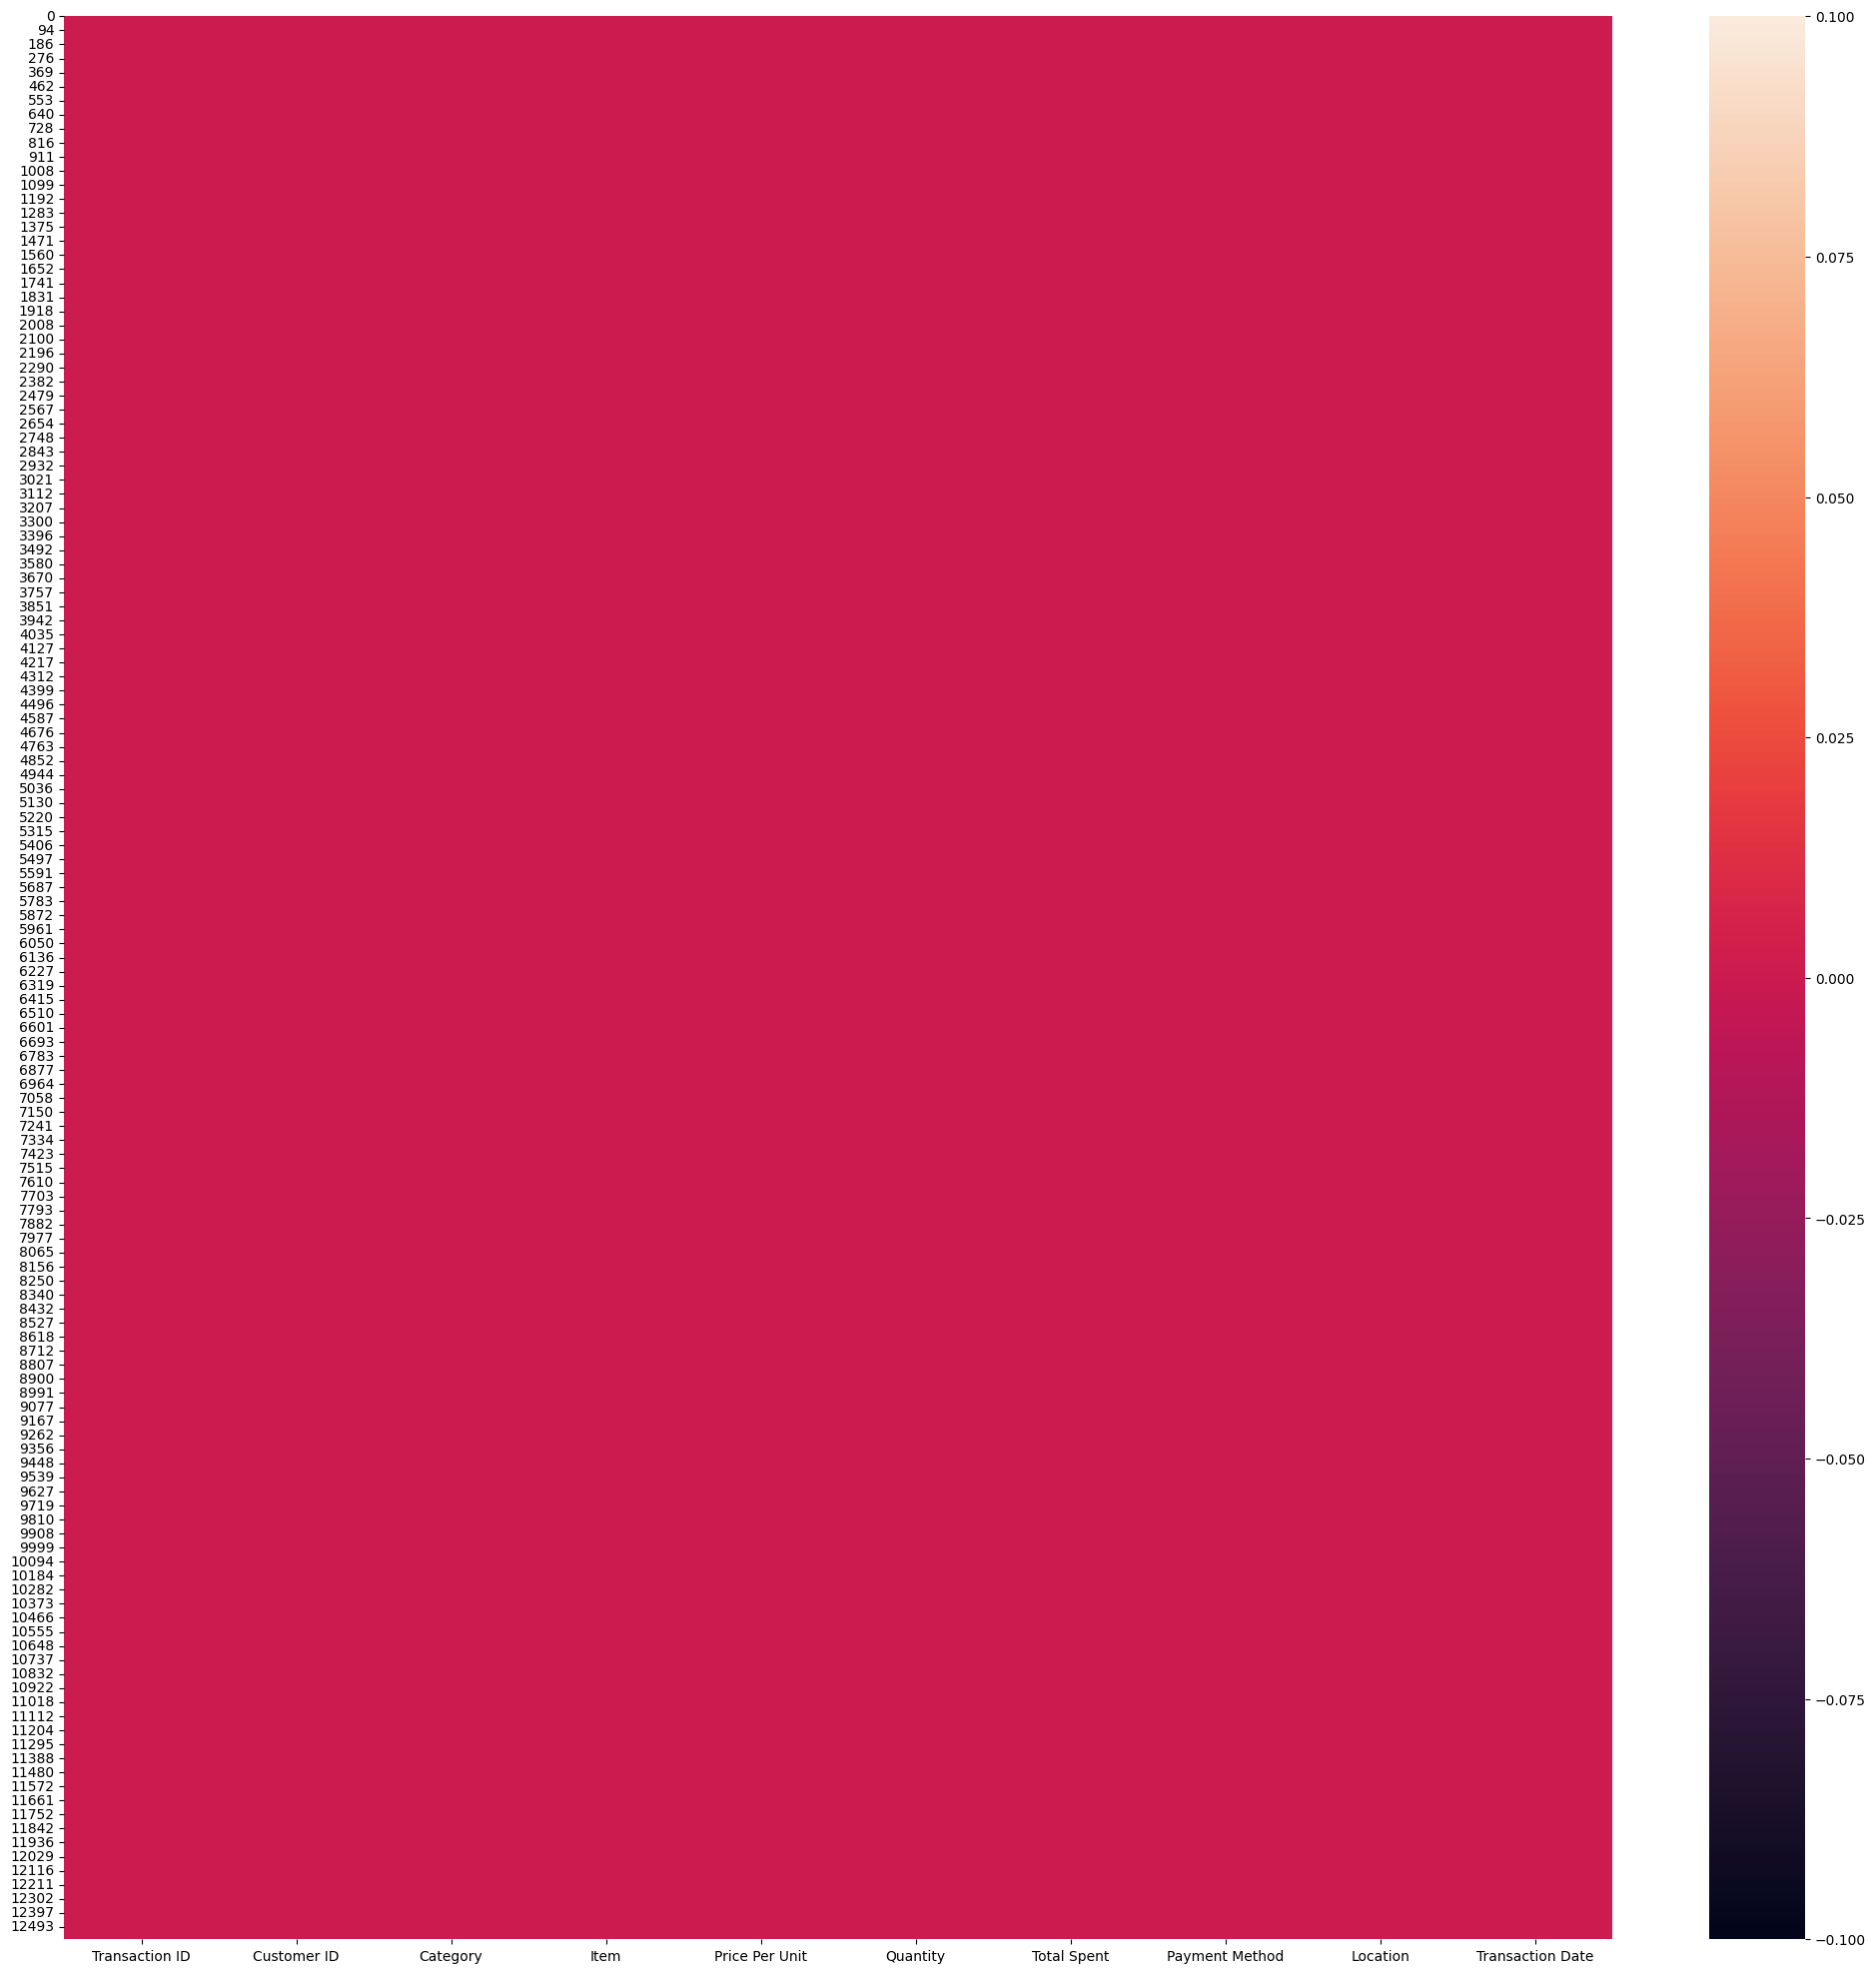

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
df3_drop_rows.shape

(11362, 10)

In [ ]:
df3_drop_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11362 non-null  object 
 1   Customer ID       11362 non-null  object 
 2   Category          11362 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11362 non-null  float64
 5   Quantity          11362 non-null  float64
 6   Total Spent       11362 non-null  float64
 7   Payment Method    11362 non-null  object 
 8   Location          11362 non-null  object 
 9   Transaction Date  11362 non-null  object 
dtypes: float64(3), object(7)
memory usage: 976.4+ KB


In [ ]:
df3_drop_rows.select_dtypes(include=["float64"]).columns

Index(['Price Per Unit', 'Quantity', 'Total Spent'], dtype='object')

<ipython-input-27-7d7af3c5797c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price Per Unit'])


<Axes: xlabel='Price Per Unit', ylabel='Density'>

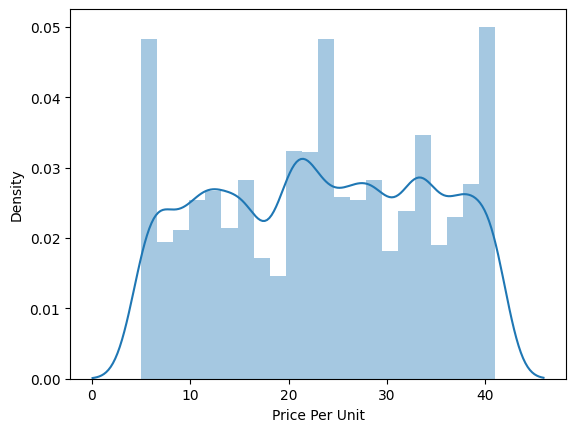

In [ ]:
sns.distplot(df['Price Per Unit'])

<ipython-input-29-90d552e78396>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows['Price Per Unit'])


<Axes: xlabel='Price Per Unit', ylabel='Density'>

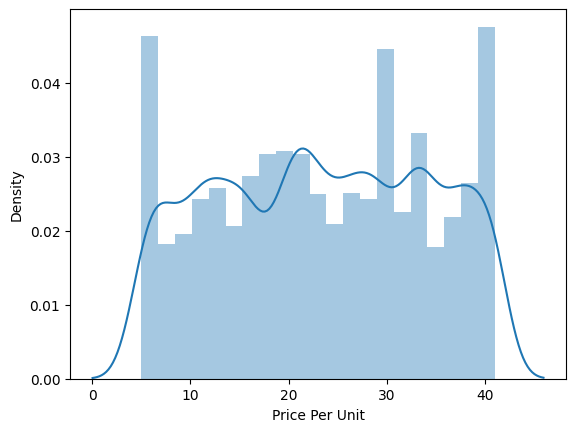

In [ ]:
sns.distplot(df3_drop_rows['Price Per Unit'])

<ipython-input-30-4ad60b6c9532>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price Per Unit'])
<ipython-input-30-4ad60b6c9532>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows['Price Per Unit'])


<Axes: xlabel='Price Per Unit', ylabel='Density'>

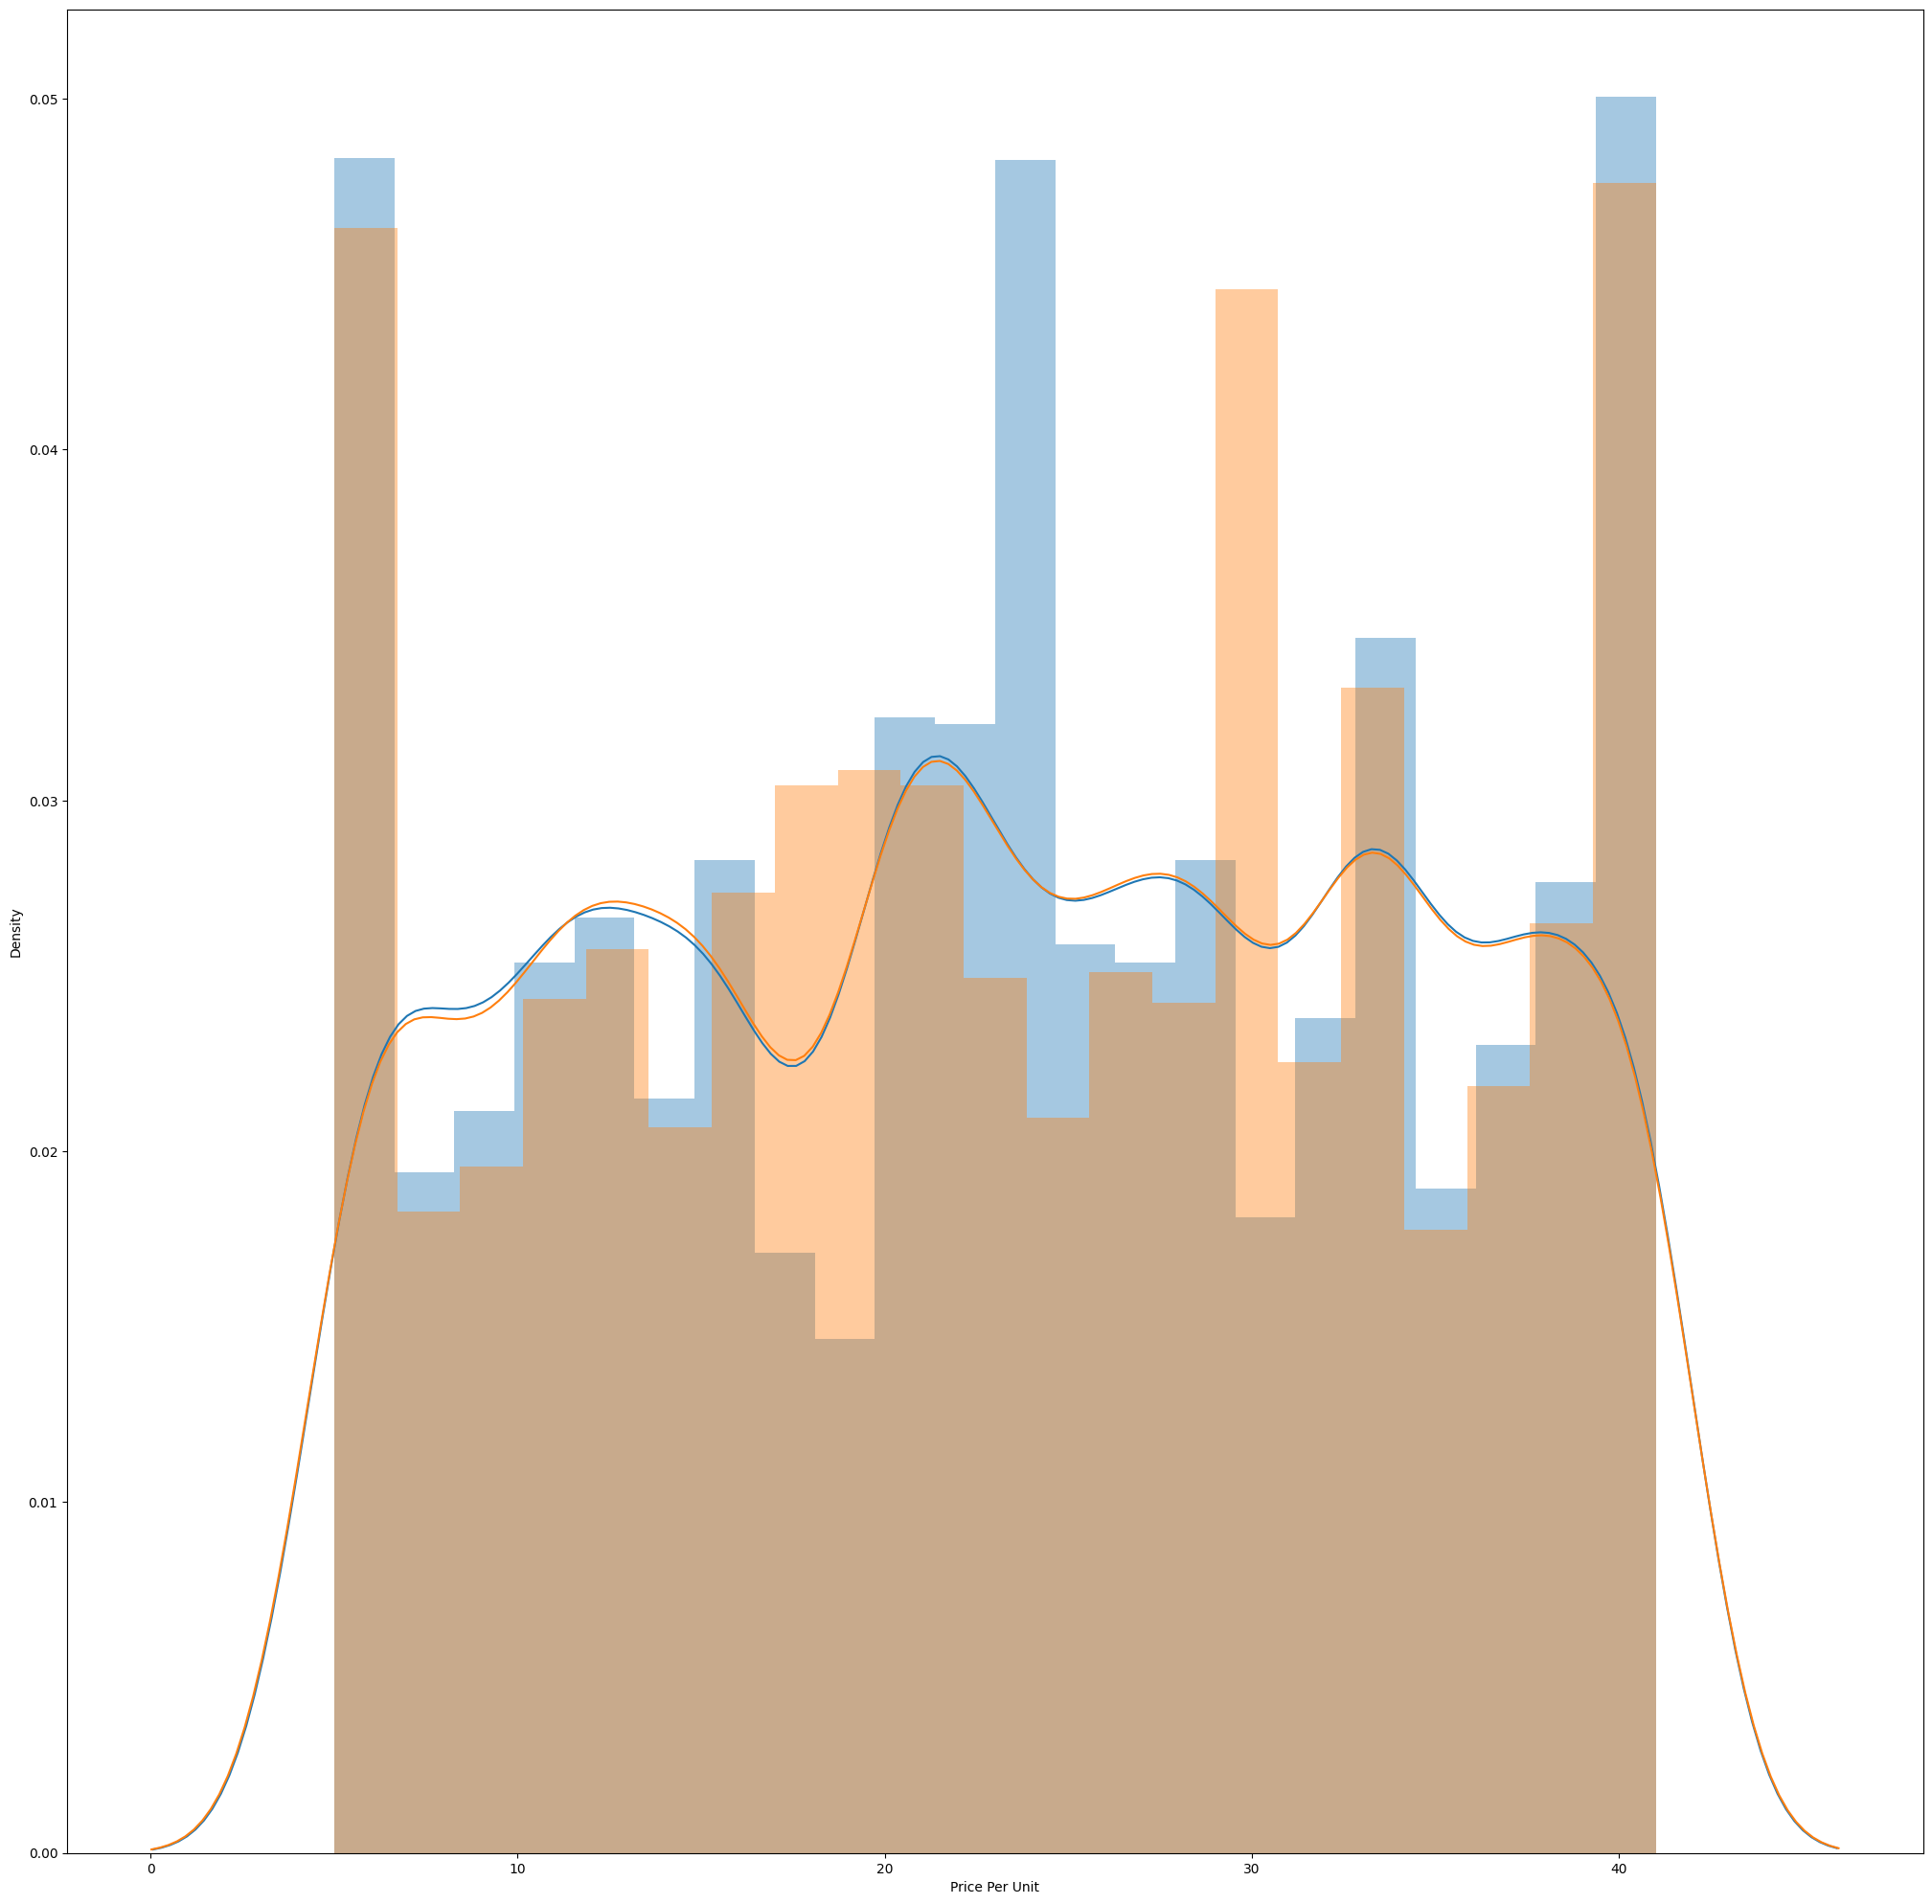

In [ ]:
plt.figure(figsize=(25,25))
sns.distplot(df['Price Per Unit'])
sns.distplot(df3_drop_rows['Price Per Unit'])

<ipython-input-31-6a131fbb0fdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])
<ipython-input-31-6a131fbb0fdf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows[var])
<ipython-input-31-6a131fbb0fdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed

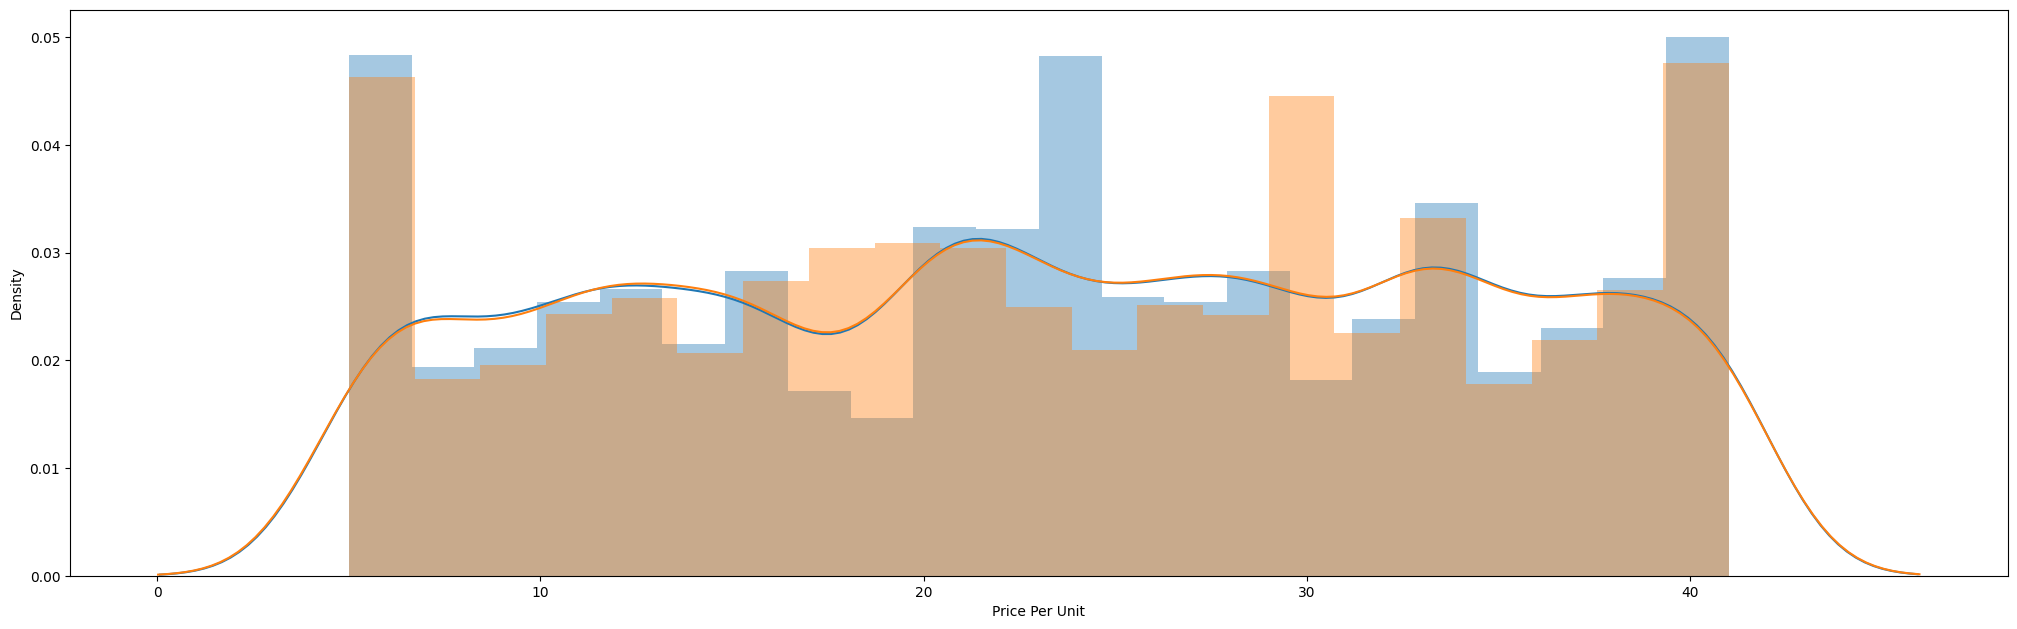

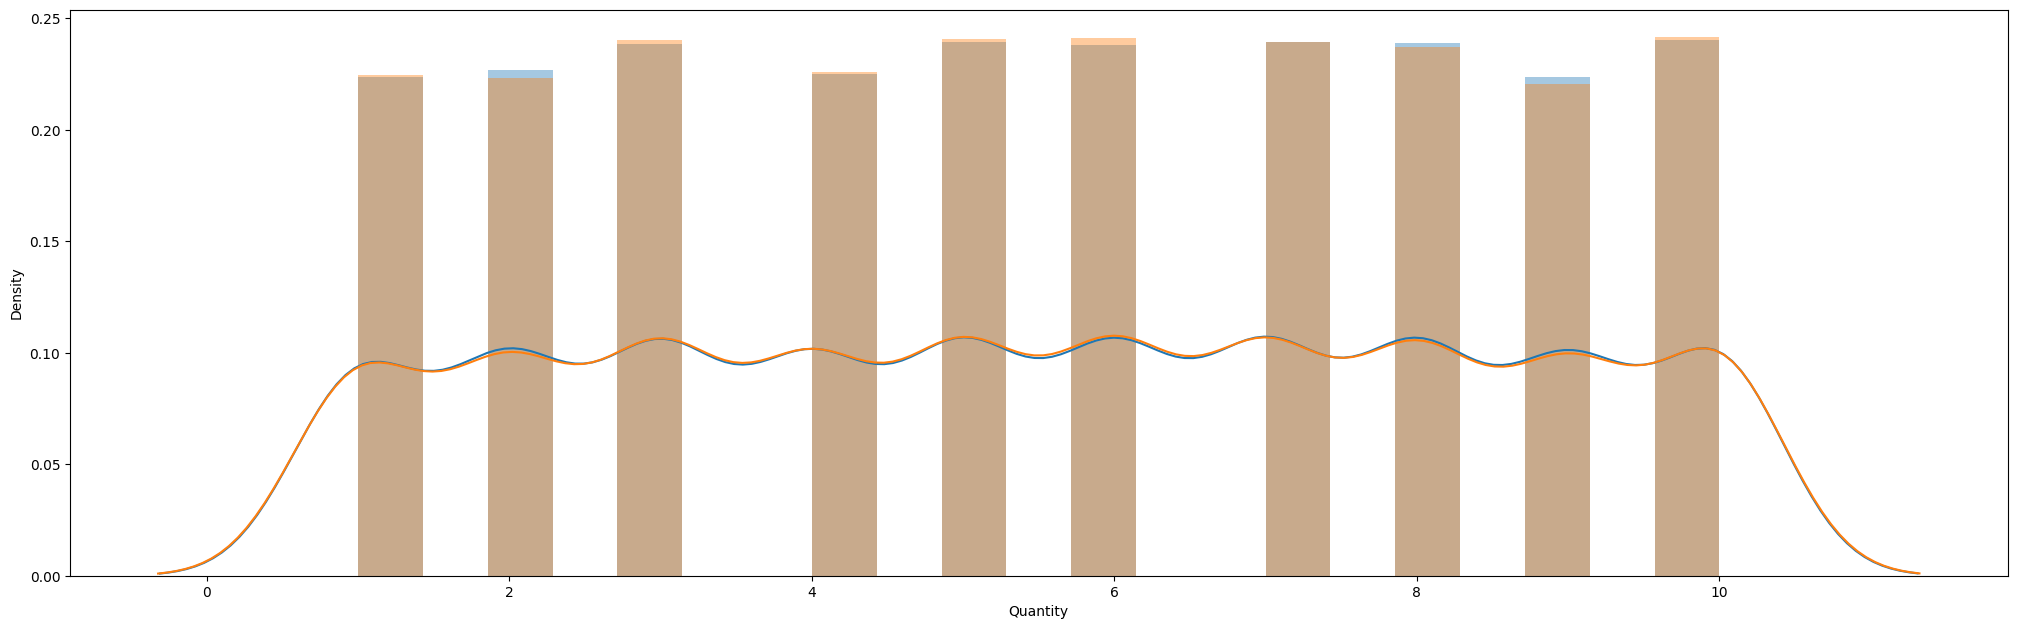

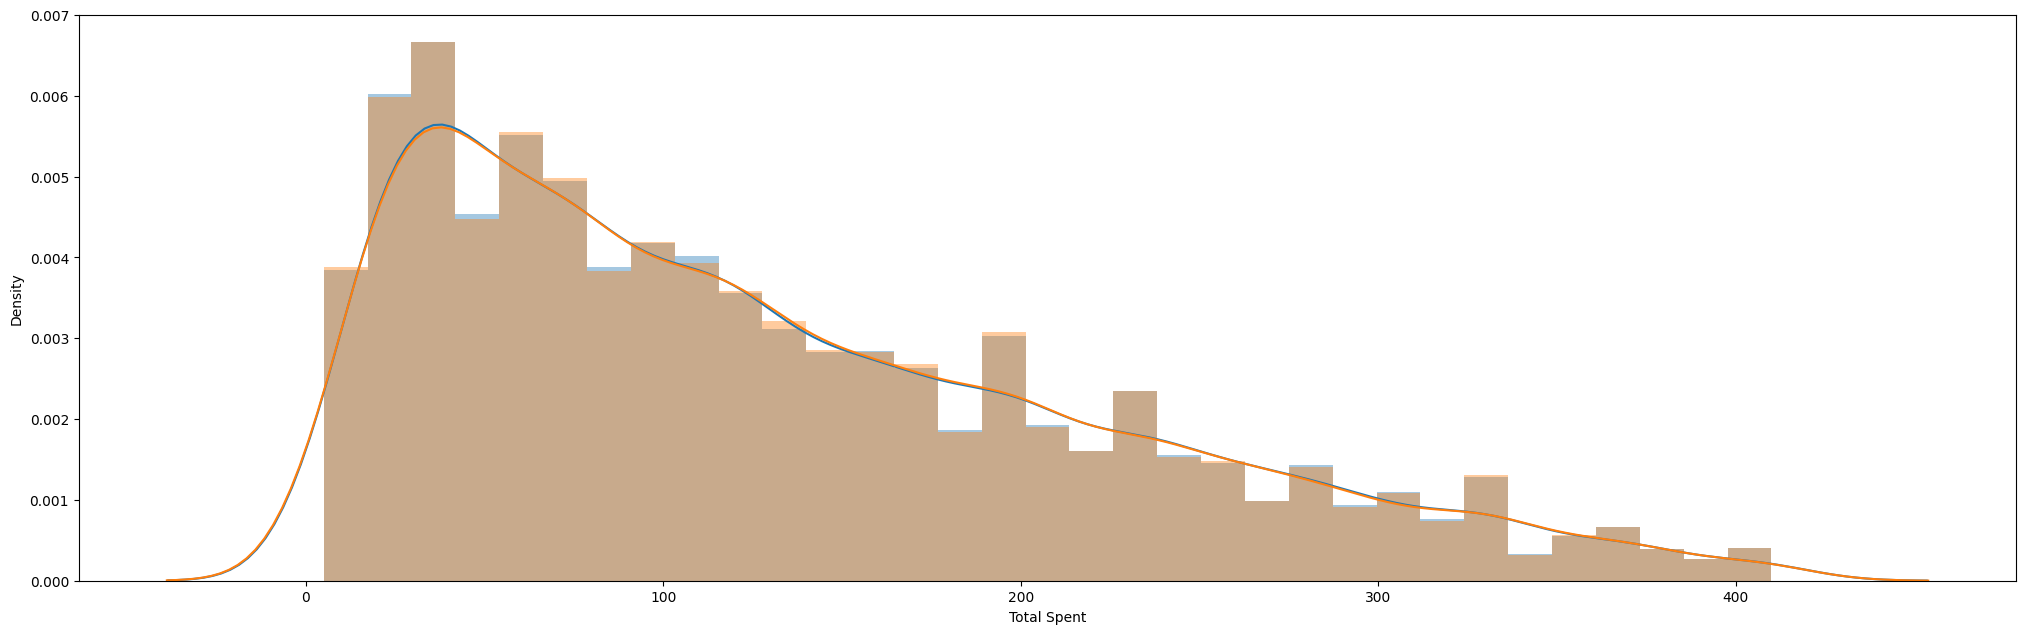

In [ ]:
num_vars=['Price Per Unit', 'Quantity', 'Total Spent']
for i,var in enumerate(num_vars):
  plt.figure(figsize=(25,25))
  plt.subplot(3,1,i+1)
  sns.distplot(df[var])
  sns.distplot(df3_drop_rows[var])

In [ ]:
df3_drop_rows.select_dtypes(include=["object"]).columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method',
       'Location', 'Transaction Date'],
      dtype='object')

In [ ]:
df['Category'].value_counts()

,count
Category,
Electric household essentials,1591
Furniture,1591
Food,1588
Milk Products,1584
Butchers,1568
Beverages,1567
Computers and electric accessories,1558
Patisserie,1528


In [ ]:
pd.concat([df['Category'].value_counts()/df.shape[0]*100,df3_drop_rows['Category'].value_counts()/df3_drop_rows.shape[0]*100],axis=1,keys=["category_og","category_new"])


,category_og,category_new
Category,,
Electric household essentials,12.652087,12.647421
Furniture,12.652087,12.849850
Food,12.628231,12.550607
Milk Products,12.596421,12.541806
Butchers,12.469185,12.506601
Beverages,12.461233,12.559409
Computers and electric accessories,12.389662,12.295371
Patisserie,12.151093,12.048935


In [ ]:
cat_vars=['Category', 'Item', 'Payment Method',
       'Location']

In [ ]:
def cat_var_dist(var):
  return pd.concat([df[var].value_counts()/df.shape[0]*100,df3_drop_rows[var].value_counts()/df3_drop_rows.shape[0]*100],axis=1,keys=[var+"_og",var+"_new"])


In [ ]:
for i,var in enumerate(cat_vars):
  print(cat_var_dist(var))

                                    Category_og  Category_new
Category                                                     
Electric household essentials         12.652087     12.647421
Furniture                             12.652087     12.849850
Food                                  12.628231     12.550607
Milk Products                         12.596421     12.541806
Butchers                              12.469185     12.506601
Beverages                             12.461233     12.559409
Computers and electric accessories    12.389662     12.295371
Patisserie                            12.151093     12.048935
               Item_og  Item_new
Item                            
Item_2_BEV    1.001988  1.108960
Item_25_FUR   0.898608  0.994543
Item_11_FUR   0.874751  0.968139
Item_16_MILK  0.866799  0.959338
Item_1_MILK   0.866799  0.959338
Item_5_FUR    0.850895  0.941736
Item_20_BUT   0.850895  0.941736
Item_14_FOOD  0.842942  0.932934
Item_11_MILK  0.842942  0.932934
Item_19_CEA   0.8